In [ ]:
import numpy as np
import pandas as pd

# Parameters for the simulation
alpha, beta, gamma, delta, theta = 0.5, 0.4, 0.3, 0.2, 0.1
noise_std = 0.1
num_steps = 100

# Initialize the time series arrays
A = np.zeros(num_steps)
B = np.zeros(num_steps)
C = np.zeros(num_steps)

# Function to update each time series
def update_time_series(t):
    A[t] = alpha * A[t-1] + np.random.normal(0, noise_std)
    B[t] = beta * B[t-1] + gamma * A[t-1] + np.random.normal(0, noise_std)
    C[t] = delta * C[t-1] + theta * B[t-1] + np.random.normal(0, noise_std)

# Perform the simulation
for t in range(1, num_steps):
    update_time_series(t)

# Combine into a DataFrame for easier handling
time_series_data = pd.DataFrame({'A': A, 'B': B, 'C': C})
time_series_data.head()  # Display the first few rows of the time series data


In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_series_data)

In [ ]:
def simulate_time_series(nodes, edges, num_steps=100, noise_std=0.1):
    # Initialize the time series data structure
    time_series_data = {node: np.zeros(num_steps) for node in nodes}
    
    # Create a mapping of influences based on edges
    influences = {child: [] for parent, child, weight in edges}
    for parent, child, weight in edges:
        influences[child].append((parent, weight))
    
    # Function to update each time series
    def update_time_series(t):
        for node in nodes:
            # Start with noise
            new_value = np.random.normal(0, noise_std)
            # Add influences from parent nodes
            for parent, weight in influences.get(node, []):
                new_value += weight * time_series_data[parent][t-1]
            # Update current node value
            time_series_data[node][t] = new_value
    
    # Perform the simulation
    for t in range(1, num_steps):
        update_time_series(t)
    
    return pd.DataFrame(time_series_data)


In [ ]:
nodes = ['A', 'B', 'C', 'D','E']
edges = [('A', 'B', 0.7),
         ('A', 'C', 0.1),
         ('C', 'D', 0.7)]

# draw the network
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
# pos = nx.spring_layout(G)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=400, alpha=0.8, arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [ ]:
df = simulate_time_series(nodes, edges, num_steps=1000, noise_std=0.1)

In [ ]:
df.plot(title='Time Series Simulation', figsize=(12,6))
plt.xlim(100, 300)

In [ ]:
from mne_connectivity import spectral_connectivity_epochs

In [ ]:
fs = 250  # sampling rate (Hz)
n_e = 300    # number of epochs
T = 10  # length of epochs (s)
f = 10  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # noise amplitude
sigma = 0.1  # Gaussian noise variance

data = []

phase_differences = [0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
for ps in zip(phase_differences):
    sig = []
    for _ in range(n_e):
        sig.append(np.sin(2 * np.pi * f * t - ps) +
                   A * np.random.normal(0, sigma, size=t.shape))
    data.append(sig)

data = np.swapaxes(np.array(data), 0, 1)  # make epochs the first dimension

In [ ]:
len(phase_differences)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[0].plot(t[:fs], data[0, 2, :fs])

ax[0].set_title(r"Phase Lagging ($-\pi/2$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[0, 4, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

plt.show()

In [ ]:
end1

In [ ]:

context = 50
target = 5
begin = 0
end1 = begin + context
end2 = end1 + target
plt.plot(t[:end1], data[0, 0, :end1], label="wave 1 (context)")
plt.plot(t[end1:end2], data[0, 0, end1:end2], label="wave 1 (target)", color="C0", linestyle="--")
plt.plot(t[:end1], data[0, 2, :end1], label="wave 2 (context)")
plt.plot(t[end1:end2], data[0, 2, end1:end2], label="wave 2 (target)", color="C1", linestyle="--")
plt.axvline(t[end1], color="k", linestyle="--")



In [ ]:
# context duration in msec
print("Context duration: {} ms".format(context * 1000 / fs))
# target duration in msec
print("Target duration: {} ms".format(target * 1000 / fs))

In [ ]:
len([0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])

In [ ]:
np.expand_dims(data[0,:,:],axis=0).shape

In [ ]:
indices = ([0, 0, 0, 0, 0], [1, 2, 3, 4, 5])

s = spectral_connectivity_epochs(
            np.expand_dims(data[0,:,:],axis=0), method='wpli', sfreq=fs, indices=indices,
            fmin=9, fmax=11, faverage=True)
s.get_data()

In [ ]:
conn = []
indices = ([0, 0, 0, 0, 0], [1, 2, 3, 4, 5])
for method in ['pli', 'wpli', 'dpli']:
    conn.append(
        spectral_connectivity_epochs(
            data, method=method, sfreq=fs, indices=indices,
            fmin=9, fmax=11, faverage=True).get_data()[:, 0])
conn = np.array(conn)

In [ ]:
x = np.arange(5)

plt.figure()
plt.bar(x - 0.2, conn[0], 0.2, align='center', label="PLI")
plt.bar(x, conn[1], 0.2, align='center', label="wPLI")
plt.bar(x + 0.2, conn[2], 0.2, align='center', label="dPLI")

plt.title("Connectivity Estimation Comparison")
plt.xticks(x, (r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"))
plt.legend()
plt.xlabel("Phase Difference")
plt.ylabel("Estimated Connectivity")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load npy file
a_head = np.load("/media/dan/Data/git/spacetimeformer/spacetimeformer/data/STF_LOG_DIR/wandb/run-20231109_080917-paj32710/files/self_attn_0_layer_0_head_0.npy")

context = 6
ydim = 6

data = a_head.copy()
data /= np.max(data, axis=-1, keepdims=True)
cmap="Blues"
tick_spacing = data.shape[-2]
fig, ax = plt.subplots(1,2, figsize=(10, 10))

ax[0].imshow(data, cmap=cmap)
ax[0].set_title("Full Attention Map")

# plot a vertical and horizontal line every "context" timesteps
for i in range(context, data.shape[0], context):
    ax[0].axvline(i-.5, color="k", linestyle="--")
    ax[0].axhline(i-.5, color="k", linestyle="--")


# take average of "box" of each waveform which is representative of attention on the global context

new = np.zeros((data.shape[0]//context, data.shape[1]//context))
for i in range(0, data.shape[0], context):
    for j in range(0, data.shape[1], context):
        new[i//context, j//context] = np.mean(data[i:i+context, j:j+context])

ax[1].imshow(new, cmap=cmap)
ax[1].set_title("Average \"block\" Attention Map")

In [ ]:
# load npy file
a_head = np.load("/media/dan/Data/git/spacetimeformer/spacetimeformer/data/STF_LOG_DIR/wandb/run-20231109_080917-paj32710/files/self_attn_210_layer_0_head_0.npy")

context = 6
ydim = 6

data = a_head.copy()
data /= np.max(data, axis=-1, keepdims=True)
cmap="Blues"
tick_spacing = data.shape[-2]
fig, ax = plt.subplots(1,2, figsize=(10, 10))

ax[0].imshow(data, cmap=cmap)
ax[0].set_title("Full Attention Map")

# plot a vertical and horizontal line every "context" timesteps
for i in range(context, data.shape[0], context):
    ax[0].axvline(i-.5, color="k", linestyle="--")
    ax[0].axhline(i-.5, color="k", linestyle="--")


# take average of "box" of each waveform which is representative of attention on the global context

new = np.zeros((data.shape[0]//context, data.shape[1]//context))
for i in range(0, data.shape[0], context):
    for j in range(0, data.shape[1], context):
        new[i//context, j//context] = np.mean(data[i:i+context, j:j+context])

ax[1].imshow(new, cmap=cmap)
ax[1].set_title("Average \"block\" Attention Map")


In [ ]:
list(range(context, data.shape[0], context))

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [175]:
edf = mne.io.read_raw_edf("/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/FC/CCEPs.EDF", preload=True, verbose=False)
# remove any channels that don't have "EEG" in the name
edf.pick([ch for ch in edf.ch_names if "EEG" in ch])

<RawEDF | CCEPs.EDF, 124 x 13383040 (6534.7 s), ~12.36 GB, data loaded>

In [176]:
sfreq = edf.info["sfreq"]

In [177]:
# select first annotation simulation time
annotations = edf.annotations
annotations = annotations.to_data_frame()

# remove annotations from raw object
edf = edf.set_annotations(None)


In [178]:
edf_start_time = edf.info['meas_date']
edf_start_time_naive = edf_start_time.replace(tzinfo=None)
edf_start_time_str = edf_start_time_naive.isoformat()
edf_start_time_np = np.datetime64(edf_start_time_str)

In [216]:
# Optionally remove SP and ISI with durations outside of a given range
def filter_intervals(start_times, durations, min_duration=None, max_duration=None, init_mask=None):
    if init_mask is not None:
        filter_mask = init_mask
    else:
        filter_mask = np.zeros(start_times.shape, dtype=bool)
    if min_duration is not None:
        filter_mask |= durations >= min_duration
    if max_duration is not None:
        filter_mask |= durations <= max_duration
    start_times = start_times[filter_mask]
    durations = durations[filter_mask]
    return start_times, durations, filter_mask


def pair_stimulation_intervals(stim_starts, stim_ends, stim_description):
    paired_starts = []
    paired_ends = []
    durations = []
    descriptions = []
    
    start_iter = iter(stim_starts)
    end_iter = iter(stim_ends)
    desc_iter = iter(stim_description)  # Iterator for descriptions

    start = next(start_iter, None)
    end = next(end_iter, None)
    desc = next(desc_iter, None)

    while start is not None and end is not None:
        if start < end:
            paired_starts.append(start)
            paired_ends.append(end)
            durations.append(((end - start) / np.timedelta64(1, 's')).item())
            descriptions.append(desc)  # Append the corresponding description
            start = next(start_iter, None)
            end = next(end_iter, None)
            desc = next(desc_iter, None)  # Move to the next description
        elif start >= end:
            end = next(end_iter, None)

    return np.array(paired_starts), np.array(paired_ends), np.array(durations), np.array(descriptions)

# Function to calculate ISI given the paired start and end times of SP, returning durations as floats
def calculate_isi(paired_starts, paired_ends):
    isi_starts = paired_ends[:-1]  # ISI starts right after each stimulation ends, except the last one
    isi_ends = paired_starts[1:]   # ISI ends right when the next stimulation starts
    isi_durations = ((isi_ends - isi_starts) / np.timedelta64(1, 's')).astype(float)
    return isi_starts, isi_durations


# --------------------------------------------------

# the word "Stimulation" will be in the string of the description and represents start of stimulation. 
# the row after will be the end of stimulation
stim_start = annotations[annotations.description.str.contains("Start Stimulation")]
stim_start_description = stim_start.description.values

# end stimulation is labeled as De-block end
stim_end = annotations[annotations.description.str.contains("De-block end")]

# get the start and end times of the stimulations
stim_start = stim_start.onset.values
stim_end = stim_end.onset.values


# Order the arrays
stim_start_sorted = np.sort(stim_start)
stim_end_sorted = np.sort(stim_end)


# Use the function to pair up stimulations
sp_start_times, sp_end_times, sp_durations, sp_descriptions = pair_stimulation_intervals(stim_start_sorted, stim_end_sorted, stim_start_description)

# Calculate the ISI intervals
isi_start_times, isi_durations = calculate_isi(sp_start_times, sp_end_times)


# # convert sp_start_times and isi_start_times to seconds from the start of the recording
sp_start_times = (sp_start_times - edf_start_time_np) / np.timedelta64(1, 's')
isi_start_times = (isi_start_times - edf_start_time_np) / np.timedelta64(1, 's')

# filter sp and isi to be relitively similar to median duration
sp_thresh = np.median(sp_durations) - np.std(sp_durations)
isi_thresh = np.median(isi_durations) - np.std(isi_durations)

# sp_start_times, _, sp_filter_mask = filter_intervals(sp_start_times, sp_durations, min_duration=sp_thresh)
# # # filter description as well
# sp_descriptions, sp_durations, *_  = filter_intervals(sp_descriptions, sp_durations,  min_duration=sp_thresh, init_mask=sp_filter_mask)
# isi_start_times, isi_durations, *_ = filter_intervals(isi_start_times, isi_durations, min_duration=isi_thresh, init_mask=sp_filter_mask)

In [220]:
isi_durations

array([  10.584473,   17.556153,   22.919921,   21.694824,   21.237304,
         40.671387,   17.350098,   17.550293,   51.70459 ,   22.628906,
         25.399902,   21.382324,   24.665527,   22.666992,   19.000489,
         18.655274,   19.680664,   38.517578,  133.943848,   21.291992,
         18.942383,   18.661133,   73.146484,   28.334473,   32.308594,
         38.20752 ,   21.297851,   17.252442,   19.804688,  146.435059,
         17.698242,   18.265625,   22.466309,   51.183105,   18.782226,
         83.26123 ,   20.999023,   77.315918,   63.475586,   19.598633,
         30.683105,   42.116211,   35.55957 ,  413.007324,   25.074218,
         17.070312,   19.455567,   17.793457, 1242.786133,   17.926269,
         18.543457,   19.466797,   57.38379 ,   30.890137,   16.202149,
         19.729492,   18.099121,   17.294922,   29.385254,   17.698731,
         26.701172,   19.819336,   18.182618,   21.328613,   46.563476,
         27.319824,   18.458984])

In [198]:
# concatenate the arrays of the annotations/durations and make a description
descriptions = ["Stimulation"] * len(sp_durations)
descriptions += ["ISI"] * len(isi_durations)
onsets = np.concatenate([sp_start_times, isi_start_times])
durations = np.concatenate([sp_durations, isi_durations])


new_annotations = mne.Annotations(onset=onsets, duration=durations, description=descriptions)

edf = edf.set_annotations(new_annotations)  


In [209]:
sp_start_times

array([ 677.117676,  719.398438,  768.598633,  823.189941,  876.488281,
        929.328613, 1001.638184, 1050.641602, 1099.796387, 1183.149902,
       1237.368652, 1294.439941, 1347.470215, 1403.738281, 1458.140625,
       1508.754395, 1559.027344, 1610.38623 , 1680.568359, 1846.136719,
       1899.088379, 1949.609863, 1999.918457, 2104.694824, 2164.70459 ,
       2228.680664, 2298.504395, 2351.48291 , 2400.416504, 2615.508789,
       2664.800781, 2714.632324, 2768.709473, 2851.505859, 3006.939941,
       3059.550781, 3168.44873 , 3263.652344, 3314.90625 , 3377.10498 ,
       3450.824219, 3517.996582, 3962.663086, 4019.320312, 4068.056152,
       4119.123047, 4168.572266, 5443.032715, 5492.583984, 5542.69873 ,
       5593.744141, 5682.70752 , 5745.275879, 5793.088379, 5844.402344,
       5894.12793 , 5943.099121, 6004.117188, 6053.492188, 6111.819824,
       6163.318359, 6213.179688, 6266.189941, 6344.44873 , 6403.347168,
       6453.355957])

In [212]:
isi_start_times

array([ 708.813965,  751.04248 ,  800.27002 ,  854.793457,  908.091309,
        960.966797, 1033.291504, 1082.246094, 1131.445312, 1214.739746,
       1269.040039, 1326.087891, 1379.072754, 1435.473633, 1489.753906,
       1540.37207 , 1590.705566, 1642.050781, 1712.192871, 1877.796387,
       1930.66748 , 1981.257324, 2031.54834 , 2136.370117, 2196.37207 ,
       2260.296875, 2330.185059, 2383.164062, 2432.043457, 2469.07373 ,
       2647.102539, 2696.366699, 2746.243164, 2800.322754, 2883.084473,
       2923.678711, 3038.551758, 3091.132812, 3200.176758, 3295.307617,
       3346.421875, 3408.708008, 3482.437012, 3549.655762, 3994.246094,
       4050.98584 , 4099.66748 , 4150.778809, 4200.246582, 5474.657715,
       5524.155273, 5574.277344, 5625.32373 , 5714.385742, 5776.88623 ,
       5824.672852, 5876.028809, 5925.804199, 5974.731934, 6035.793457,
       6085.118652, 6143.499023, 6194.99707 , 6244.861328, 6297.885254,
       6376.027344, 6434.896973])

In [202]:
import pandas as pd
df_filtered = pd.DataFrame({'description': sp_descriptions})
# get the "__ to __" label from description.  Will always be a chunk of words,symbols,numbers space to space words,symbols,numbers
extracted_df = df_filtered.description.str.extract(r"(\b\w+\'?\w*\b to \b\w+\'?\w*\b)").rename(columns={0: "label"}).reset_index(drop=True)

# Duplicating each row
duplicated_df = extracted_df.loc[extracted_df.index.repeat(2)].reset_index(drop=True)

# Prepending "STIM @ " to the original line and "ISI @ " to the duplicated line
duplicated_df['label'] = duplicated_df.groupby(duplicated_df.index // 2).cumcount().map({0: 'STIM @ ', 1: 'ISI @ '}) + duplicated_df['label']




In [203]:
duplicated_df

,label
0,STIM @ IP1 to IP2
1,ISI @ IP1 to IP2
2,STIM @ IP1 to IP2
3,ISI @ IP1 to IP2
4,STIM @ IP1 to IP2
...,...
127,ISI @ C11 to C12
128,STIM @ A13 to A14
129,ISI @ A13 to A14
130,STIM @ C13 to C14


In [205]:
new_annotations

<Annotations | 133 segments: ISI (67), Stimulation (66)>

In [9]:
events, event_id = mne.events_from_annotations(edf, verbose=False, regexp='ISI')

isi_epochs = mne.Epochs(edf, events, event_id, baseline=None, tmin=-0.1, tmax=np.median(isi_durations), preload=True, verbose=False)
isi_epochs.get_data().shape

(67, 124, 43887)

In [10]:
events, event_id = mne.events_from_annotations(edf, verbose=False, regexp='Stimulation')

sp_epochs = mne.Epochs(edf, events, event_id, baseline=None, tmin=-0.1, tmax=np.median(sp_durations), preload=True, verbose=False)
sp_epochs.get_data().shape

(66, 124, 64981)

In [11]:
from mne_connectivity import spectral_connectivity_time


In [63]:
test = sp_epochs.get_data()[0,:,:]
# reformat to add back first dimension
test = np.expand_dims(test, axis=0)
print(test.shape)

# cut test to a few seconds
test = test[:,:,int(sfreq)*10:int(sfreq)*20]
test.shape

(1, 124, 64981)


(1, 124, 20480)

In [64]:
mne.set_config('MNE_MEMMAP_MIN_SIZE', '100M') 
mne.set_config('MNE_CACHE_DIR', '/dev/shm')

In [65]:
mne.get_config('MNE_MEMMAP_MIN_SIZE')

'100M'

In [66]:
stest = spectral_connectivity_time(test, freqs=np.arange(2,100), method='coh', sfreq=sfreq, faverage=True, n_jobs=55)

Fmin was not specified. Using fmin=min(freqs)
Fmax was not specified. Using fmax=max(freqs).
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...


[Parallel(n_jobs=55)]: Using backend LokyBackend with 55 concurrent workers.
[Parallel(n_jobs=55)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=55)]: Done  95 out of 124 | elapsed:    5.1s remaining:    1.6s
[Parallel(n_jobs=55)]: Done 120 out of 124 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=55)]: Done 124 out of 124 | elapsed:    6.3s finished
[Parallel(n_jobs=55)]: Using backend LokyBackend with 55 concurrent workers.
[Parallel(n_jobs=55)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=55)]: Done 107 tasks      | elapsed:    4.8s
[Parallel(n_jobs=55)]: Done 233 tasks      | elapsed:    5.7s
[Parallel(n_jobs=55)]: Done 395 tasks      | elapsed:    7.1s
[Parallel(n_jobs=55)]: Done 593 tasks      | elapsed:    8.7s
[Parallel(n_jobs=55)]: Done 827 tasks      | elapsed:   10.6s
[Parallel(n_jobs=55)]: Done 1097 tasks      | elapsed:   12.8s
[Parallel(n_jobs=55)]: Done 1403 tasks      | elapsed:   15.2s
[Parallel(n_jobs=55)]: Done 1745 tasks      | elapsed

[Connectivity computation done]


In [46]:
stest.get_data('dense').shape

(1, 124, 124, 1)

In [47]:
conn = stest.get_data('dense')
conn.shape

(1, 124, 124, 1)

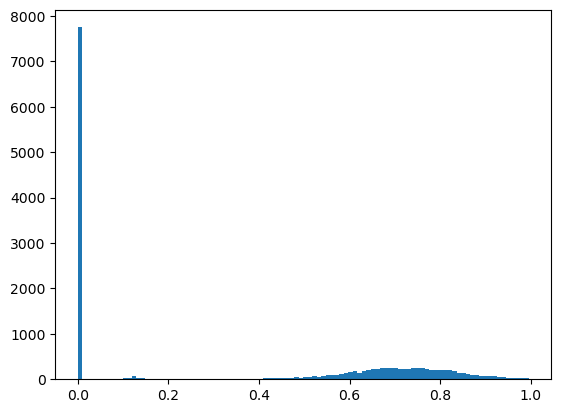

In [67]:
plt.hist(stest.get_data().squeeze(), bins=100);

In [68]:
coh = conn.copy().squeeze()
coh.shape

(124, 124)

(9, 9)

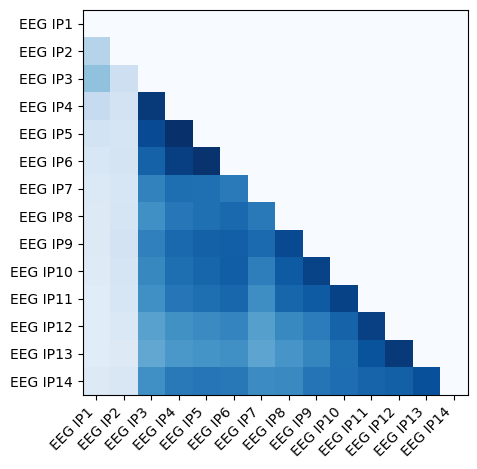

In [96]:
beg = 42
end = 56
electrode = coh[beg:end,beg:end]
plt.figure(figsize=(5,5))
plt.imshow(electrode, cmap="Blues")
# show electrode labels on x/y instead of indices
names = sp_epochs.ch_names[beg:end]
plt.xticks(np.arange(len(names)), names, rotation=45, ha="right");
plt.yticks(np.arange(len(names)), names);

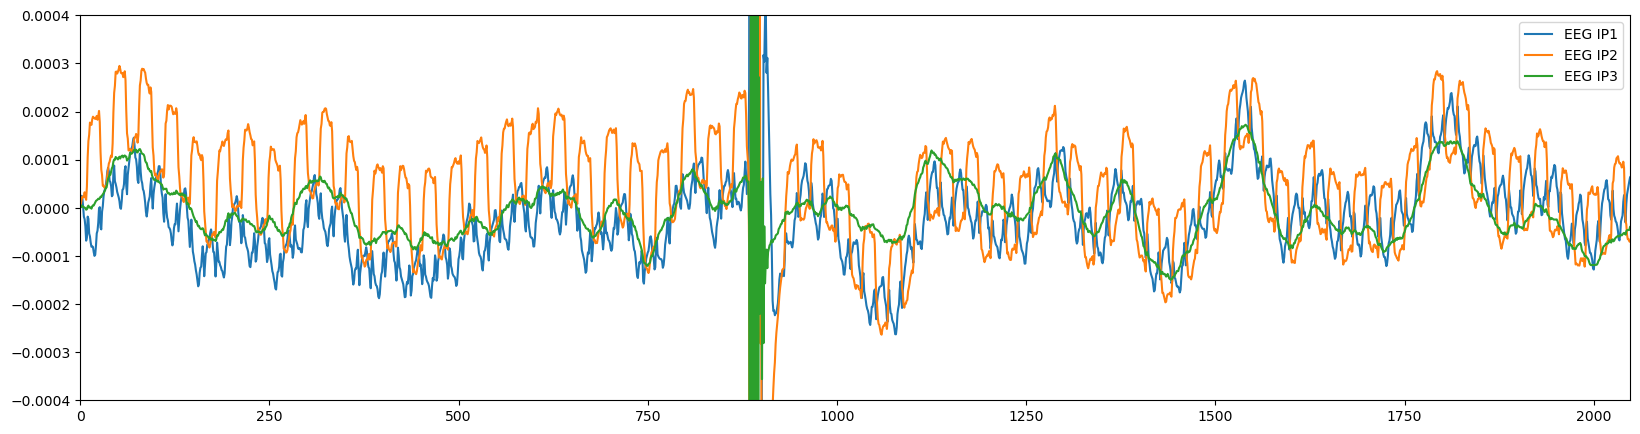

In [90]:
beg = 42
end = 45
a = test.squeeze()[beg:end,:]
a = a.T-a[:,0]

plt.figure(figsize=(20,5))
plt.plot(a)
plt.ylim(-0.0004, 0.0004)
plt.xlim(0,2048)
ch_names = sp_epochs.ch_names
plt.legend(ch_names[beg:end])

[  0  10  18  26  42  56  64  72  82  96 110]
['R' 'Br' 'S' 'Q' 'IP' 'TO' 'W' 'U' 'C' 'A' 'L']


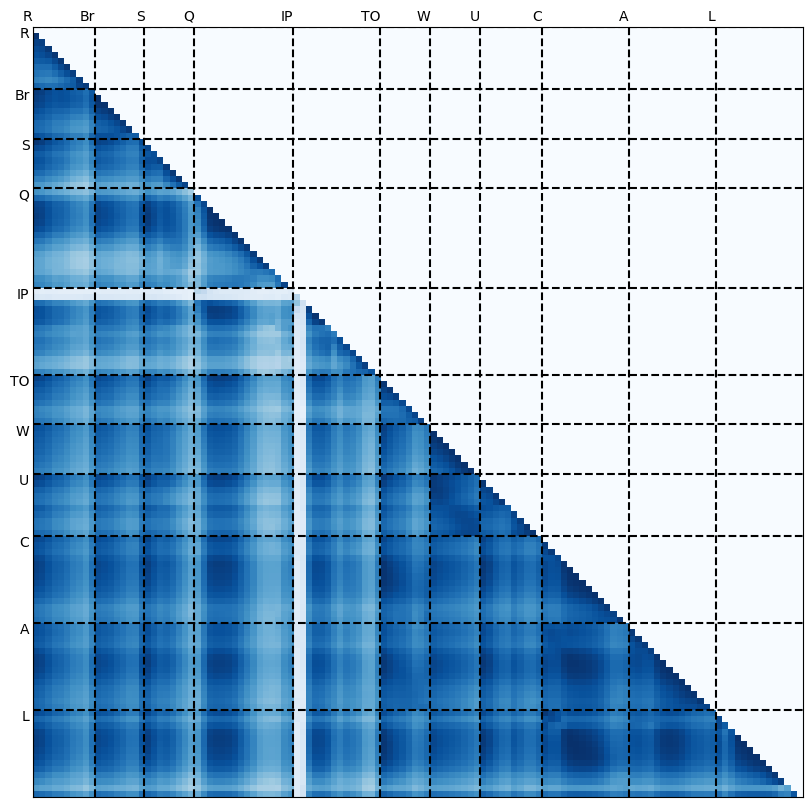

In [131]:
names = sp_epochs.ch_names
names = [x[4:] for x in names]

def get_contact(x):
    return ''.join([i for i in x if not i.isdigit()])

uniq_ec = list(set(get_contact(s) for s in names))
uniq_ec

# get the indices of the beginning of each electrode contact
indices = []
for i in uniq_ec:
    for j in range(len(names)):
        if i in names[j]:
            indices.append(j)
            break

# reorder indices and uniq_ec
indices = np.array(indices)
uniq_ec = np.array(uniq_ec)
uniq_ec = uniq_ec[np.argsort(indices)]
indices = indices[np.argsort(indices)]
print(indices)
print(uniq_ec)

indices = np.array(indices) - 0.5

plt.figure(figsize=(10,10))
plt.imshow(conn.squeeze(), cmap="Blues")
# put a vertical line every time the electrode changes and label it outside the plot
for x,i in enumerate(indices):
    plt.axvline(i, color="k", linestyle="--")
    plt.text(i, -1, uniq_ec[x], rotation=0, va="bottom", ha="right")

# put a horizontal line every time the electrode changes and label it outside the plot
for x,i in enumerate(indices):
    plt.axhline(i, color="k", linestyle="--")
    plt.text(-1, i, uniq_ec[x], rotation=0, va="top", ha="right")

# remove the ticks
plt.xticks([])
plt.yticks([]);

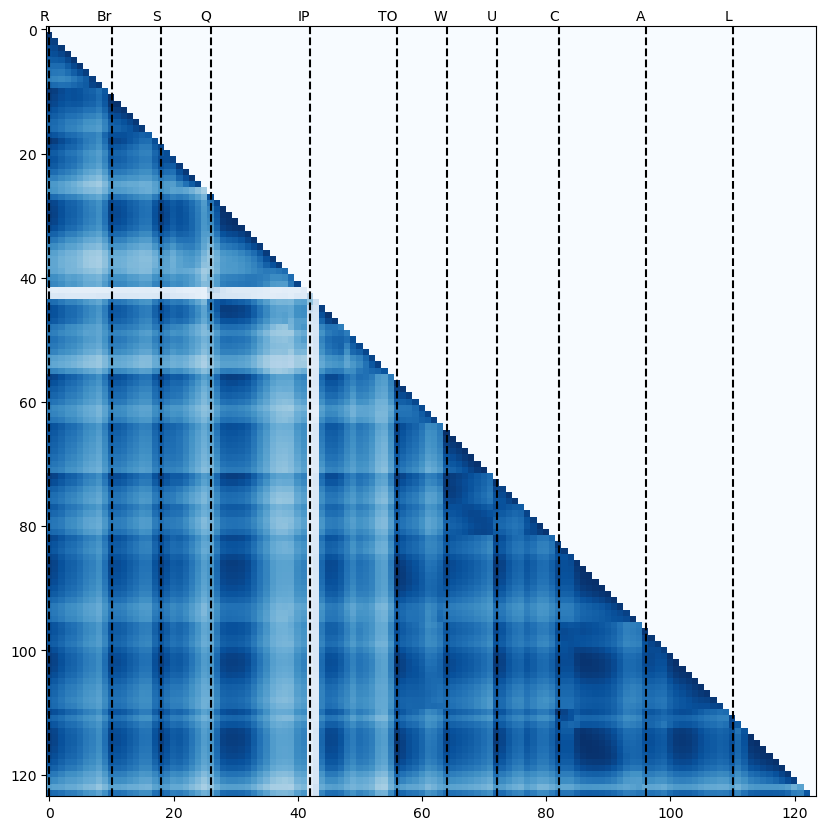

In [58]:
channels = sp_epochs.ch_names
channels[42:44]

['EEG IP1', 'EEG IP2']

In [ ]:
from mne_connectivity import spectral_connectivity_time

s = spectral_connectivity_time(sp_epochs, freqs=np.arange(2,100), method='coh', sfreq=sfreq, fmin=2, fmax=100, faverage=True, n_jobs=55)

In [ ]:
conn = s.get_data('dense')
conn.shape

In [ ]:
plt.hist(s.get_data(), bins=100);

In [ ]:
plt.imshow(conn.copy(), cmap="Blues")


In [ ]:
filtered = conn.copy().squeeze()

# filtered[np.logical_and(filtered > 0.49, filtered < 0.51)] = np.nan
filtered[filtered < 0.5] = np.nan
filtered[filtered == 0] = np.nan

plt.imshow(filtered, cmap="Blues")
plt.axvline(18.5)
plt.axvline(23.5)

In [ ]:
channels = isi_epochs.ch_names
channels[18:24]

In [ ]:
# from mne_connectivity import spectral_connectivity_epochs
# conn = []
# for method in ['pli', 'wpli', 'dpli']:
#     conn.append(
#         spectral_connectivity_epochs(
#             data, method=method, sfreq=fs, indices=indices,
#             fmin=9, fmax=11, faverage=True).get_data()[:, 0])
# conn = np.array(conn)